In [1]:
#IMPORTAZIONI E PARAMETRI DI BASE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

#CARICAMENTO DATI DI TRAINING
df_train = pd.read_csv('settimana_normale.csv')
df_train['datetime'] = pd.to_datetime(df_train['Timestamp'])
df_train.set_index('datetime', inplace=True)

# Feature
df_train['hour'] = df_train.index.hour
df_train['dayofweek'] = df_train.index.dayofweek
df_train['dT'] = df_train['Temperatura (°C)'].diff()
df_train['dT_long'] = df_train['Temperatura (°C)'].diff(periods=5)
df_train['SMA_3'] = df_train['Temperatura (°C)'].rolling(window=3).mean()

df_train['dU'] = df_train['Umidità (%)'].diff()
df_train['dU_long'] = df_train['Umidità (%)'].diff(periods=5)
df_train['SMA_U'] = df_train['Umidità (%)'].rolling(window=3).mean()

# Rimozione NaN dopo differenze e rolling
df_train.dropna(inplace=True)

# Nuovo vettore delle feature multivariate
features = [
    'Temperatura (°C)', 'dT', 'dT_long', 'SMA_3',
    'Umidità (%)', 'dU', 'dU_long', 'SMA_U',
    'hour', 'dayofweek'
]

X_train = df_train[features]

In [7]:
#CARICAMENTO DATI DI TEST
df = pd.read_csv('anomalia_multivariata.csv')
df['datetime'] = pd.to_datetime(df['Timestamp'])
df.set_index('datetime', inplace=True)

# Feature engineering su test set
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['dT'] = df['Temperatura (°C)'].diff()
df['dT_long'] = df['Temperatura (°C)'].diff(periods=5)
df['SMA_3'] = df['Temperatura (°C)'].rolling(window=3).mean()

df['dU'] = df['Umidità (%)'].diff()
df['dU_long'] = df['Umidità (%)'].diff(periods=5)
df['SMA_U'] = df['Umidità (%)'].rolling(window=3).mean()

# Rimozione NaN dopo differenze e rolling
df.dropna(inplace=True)

# Nuovo vettore delle feature multivariate
features = [
    'Temperatura (°C)', 'dT', 'dT_long', 'SMA_3',
    'Umidità (%)', 'dU', 'dU_long', 'SMA_U',
    'hour', 'dayofweek'
]

X_test = df[features]

In [8]:
# MODELLO 
model = IsolationForest(contamination=0.14, random_state=42)
model.fit(X_train)

# Predizione (1 = normale, -1 = anomalia)
df['anomaly'] = model.predict(X_test)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 se anomalia

# Visualizza anomalie
#print(df[df['anomaly'] == 1].head())  # Mostra le prime anomalie

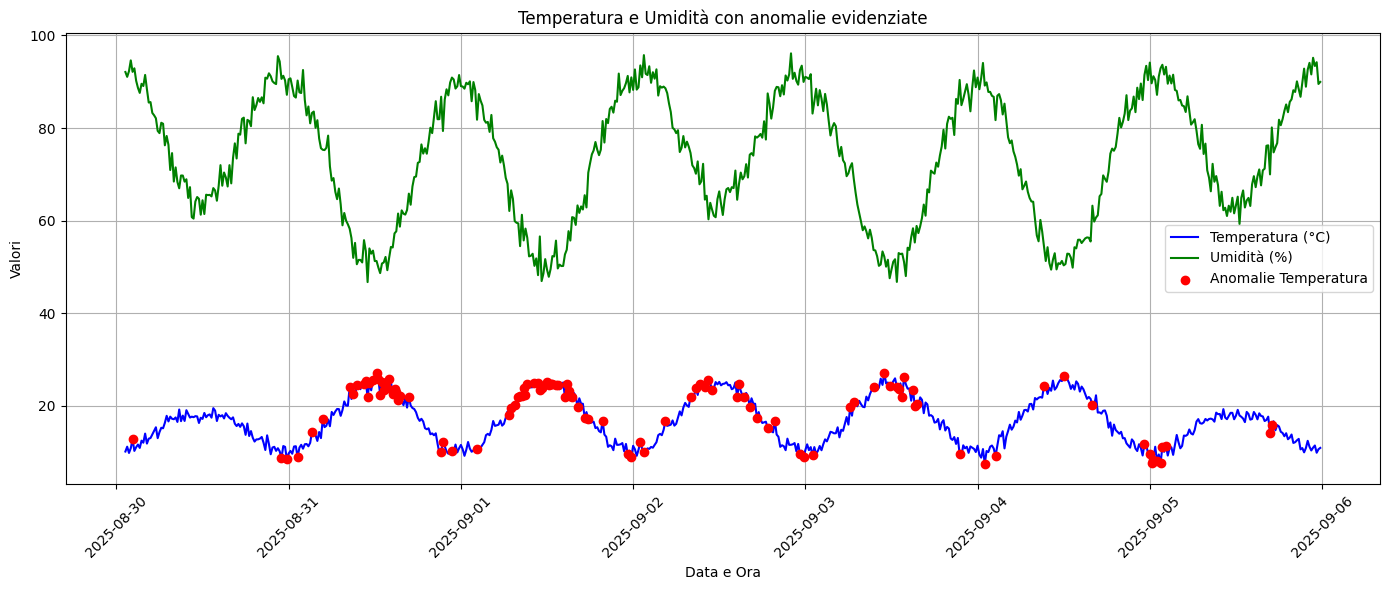

In [9]:
plt.figure(figsize=(14,6))

# Plot delle curve di temperatura e umidità
plt.plot(df.index, df['Temperatura (°C)'], label='Temperatura (°C)', color='blue')
plt.plot(df.index, df['Umidità (%)'], label='Umidità (%)', color='green')

# Estrai solo le anomalie
anomalie = df[df['anomaly'] == 1]

# Scatter dei punti anomali sulla Temperatura
plt.scatter(anomalie.index, anomalie['Temperatura (°C)'], 
            color='red', label='Anomalie Temperatura', zorder=5)

# Setup asse x con giorni e ore leggibili
plt.xlabel('Data e Ora')
plt.ylabel('Valori')
plt.title('Temperatura e Umidità con anomalie evidenziate')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


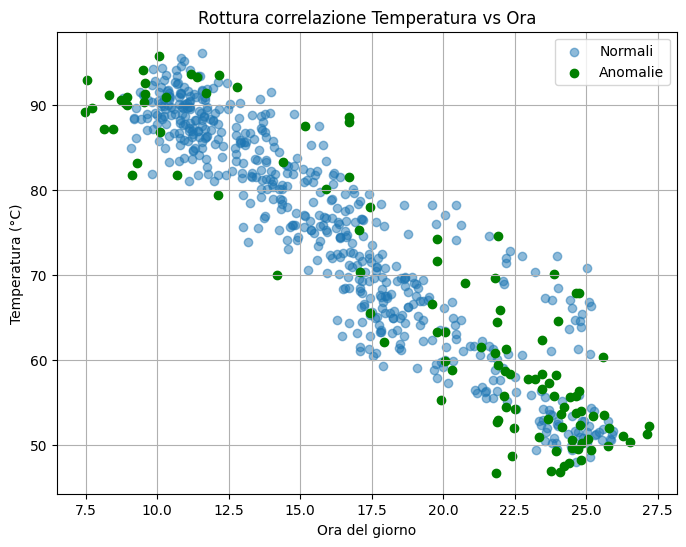

In [10]:
# Plot anomalie rilevate dal modello
normal = df[df['anomaly'] == 0]
anomaly = df[df['anomaly'] == 1]

plt.figure(figsize=(8, 6))
plt.scatter(normal['Temperatura (°C)'], normal['Umidità (%)'], label='Normali', alpha=0.5)
plt.scatter(anomaly['Temperatura (°C)'], anomaly['Umidità (%)'], color='green', label='Anomalie')
plt.xlabel('Ora del giorno')
plt.ylabel('Temperatura (°C)')
plt.title('Rottura correlazione Temperatura vs Ora')
plt.legend()
plt.grid(True)
plt.show()